## Final Project 4: Modeling Performance

### Introduction

Problem: Predicting a states migrant growth (domestic and international) based on energy consumption, population estimates, and division.

Hypothesis: States with higher populations and consumption of electricity and will show a positive rate of net migration

United States Energy, Census, and GDP 2010-2014
The dataset, a compilation of three government sets, came from kaggle, with the creator providing a dictionary for the variables
https://www.kaggle.com/lislejoem/us_energy_census_gdp_10-14
Covering the 50 states, DC, and the USA as a whole, it consists Energy Consumption, Production, Expenditures and average price for those four years, total and for biomass, coal, electric, geothermal, natural gas, hydropower, fossil, and lpg(liquid petroleum gas). Population data includes geographic markers, population estimates and changes such as birth, death and migration. Economic Data consists of GDP per quarter and average for that year.

The USA data was dropped, as it lacked data for several variables, GDP data was dropped as extrenuous 

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv(os.path.join('..', '..', 'final-project', 'Energy Census and Economic Data US 2010-2014.csv'))
df.head(10)

,StateCodes,Region,Division,Coast,Great Lakes,TotalC2010,TotalC2011,TotalC2012,TotalC2013,TotalC2014,...,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014
0,AK,4.0,9.0,1.0,0.0,653221,653637,649341,621107,603119,...,3.203618,2.869760,-1.175137,-1.949571,-3.789313,-13.754494,0.948185,1.835376,-0.585695,-10.884734
1,AL,3.0,6.0,1.0,0.0,1931522,1905207,1879716,1919365,1958221,...,1.165832,1.157861,-0.020443,-0.168414,0.396416,0.420102,1.011941,1.001333,1.562247,1.577963
2,AR,4.0,8.0,0.0,0.0,1120632,1122544,1067642,1096438,1114409,...,2.141877,2.129805,1.369514,5.131282,3.910476,6.280636,3.336628,7.155212,6.052353,8.410441
3,AZ,3.0,7.0,0.0,0.0,1383531,1424944,1395839,1414383,1422590,...,1.090035,1.091283,1.341472,-0.420875,-0.580562,-1.313050,2.317801,0.621971,0.509473,-0.221767
4,CA,4.0,9.0,1.0,0.0,7760629,7777115,7564063,7665241,7620082,...,4.207353,4.177389,-1.162079,-1.173951,-1.341226,-0.830982,2.761377,2.772770,2.866127,3.346406
5,CO,4.0,8.0,0.0,0.0,1513547,1470445,1440781,1470844,1477177,...,2.074200,2.010735,5.183397,5.553675,6.977583,7.587163,6.933159,7.660864,9.051783,9.597898
6,CT,1.0,1.0,1.0,0.0,764970,739130,725019,754901,750019,...,4.753602,4.730950,-3.384435,-5.611492,-4.731638,-7.286252,1.116894,-1.059166,0.021964,-2.555302
7,DC,3.0,5.0,0.0,0.0,190529,183806,172963,175560,178929,...,5.871584,5.749218,11.332882,10.005838,9.777666,1.793572,16.805955,15.595790,15.649250,7.542790
8,DE,3.0,5.0,1.0,0.0,250212,272568,273728,273716,274013,...,2.608949,2.565489,2.866848,3.598380,3.397171,5.148174,5.303282,6.221263,6.006120,7.713663
9,FL,3.0,5.0,1.0,0.0,4282673,4141711,4029903,4076406,4121680,...,5.783717,5.687300,5.540393,5.125320,4.918783,7.016123,11.359606,10.722573,10.702501,12.703423


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Columns: 191 entries, StateCodes to RNETMIG2014
dtypes: float64(99), int64(91), object(1)
memory usage: 77.7+ KB


In [4]:
df.columns.values

array(['StateCodes', 'Region', 'Division', 'Coast', 'Great Lakes',
       'TotalC2010', 'TotalC2011', 'TotalC2012', 'TotalC2013',
       'TotalC2014', 'TotalP2010', 'TotalP2011', 'TotalP2012',
       'TotalP2013', 'TotalP2014', 'TotalE2010', 'TotalE2011',
       'TotalE2012', 'TotalE2013', 'TotalE2014', 'TotalPrice2010',
       'TotalPrice2011', 'TotalPrice2012', 'TotalPrice2013',
       'TotalPrice2014', 'TotalC10-11', 'TotalC11-12', 'TotalC12-13',
       'TotalC13-14', 'TotalP10-11', 'TotalP11-12', 'TotalP12-13',
       'TotalP13-14', 'TotalE10-11', 'TotalE11-12', 'TotalE12-13',
       'TotalE13-14', 'TotalPrice10-11', 'TotalPrice11-12',
       'TotalPrice12-13', 'TotalPrice13-14', 'BiomassC2010',
       'BiomassC2011', 'BiomassC2012', 'BiomassC2013', 'BiomassC2014',
       'CoalC2010', 'CoalC2011', 'CoalC2012', 'CoalC2013', 'CoalC2014',
       'CoalP2010', 'CoalP2011', 'CoalP2012', 'CoalP2013', 'CoalP2014',
       'CoalE2010', 'CoalE2011', 'CoalE2012', 'CoalE2013', 'CoalE2014',
    

In [5]:
df.describe()

/Users/sameerkurien/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Region,Division,Coast,Great Lakes,TotalC2010,TotalC2011,TotalC2012,TotalC2013,TotalC2014,TotalP2010,...,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014
count,51.000000,51.000000,51.000000,51.000000,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,...,52.000000,52.000000,51.000000,51.000000,51.000000,51.000000,52.000000,52.000000,52.000000,52.000000
mean,2.666667,5.117647,0.450980,0.156863,3.748043e+06,3.723920e+06,3.631132e+06,3.736541e+06,3.784461e+06,2.759090e+06,...,2.545359,2.501026,0.309307,0.617791,0.773470,-0.086251,2.587748,3.117434,3.303955,2.416433
std,1.051982,2.534932,0.502543,0.367290,1.339845e+07,1.331718e+07,1.298862e+07,1.336881e+07,1.354064e+07,1.038432e+07,...,1.598187,1.569279,3.334579,4.332419,4.776573,4.895949,3.602628,4.383237,4.819083,4.794439
min,1.000000,1.000000,0.000000,0.000000,1.536970e+05,1.504750e+05,1.304120e+05,1.375270e+05,1.398970e+05,9.500000e+01,...,0.631283,0.628523,-5.839158,-5.946809,-5.482049,-13.754494,-3.182714,-3.382339,-3.778986,-10.884734
25%,NaN,NaN,NaN,NaN,6.488725e+05,6.483915e+05,6.468032e+05,6.499528e+05,6.552158e+05,2.444558e+05,...,1.411803,1.392360,NaN,NaN,NaN,NaN,0.421528,0.092413,0.002172,-0.273974
50%,NaN,NaN,NaN,NaN,1.482116e+06,1.447694e+06,1.417946e+06,1.449638e+06,1.457408e+06,6.383085e+05,...,2.042578,2.019803,NaN,NaN,NaN,NaN,1.709057,1.642785,2.051458,1.524206
75%,NaN,NaN,NaN,NaN,2.533853e+06,2.448560e+06,2.378196e+06,2.443520e+06,2.461348e+06,1.499262e+06,...,3.201814,3.142864,NaN,NaN,NaN,NaN,4.264455,5.460200,5.720351,5.357469
max,4.000000,9.000000,1.000000,1.000000,9.744602e+07,9.682746e+07,9.441143e+07,9.714137e+07,9.838521e+07,7.459311e+07,...,6.426691,6.074495,11.332882,15.589637,23.189451,12.265101,16.805955,17.804574,25.104485,14.028192


In [6]:
df = df[df.StateCodes != 'US']

In [7]:
df.drop(['GDP2010Q1', 'GDP2010Q2',
       'GDP2010Q3', 'GDP2010Q4', 'GDP2010', 'GDP2011Q1', 'GDP2011Q2',
       'GDP2011Q3', 'GDP2011Q4', 'GDP2011', 'GDP2012Q1', 'GDP2012Q2',
       'GDP2012Q3', 'GDP2012Q4', 'GDP2012', 'GDP2013Q1', 'GDP2013Q2',
       'GDP2013Q3', 'GDP2013Q4', 'GDP2013', 'GDP2014Q1', 'GDP2014Q2',
       'GDP2014Q3', 'GDP2014Q4', 'GDP2014'], axis =1, inplace =True)

looked at both regional and divisional differences.

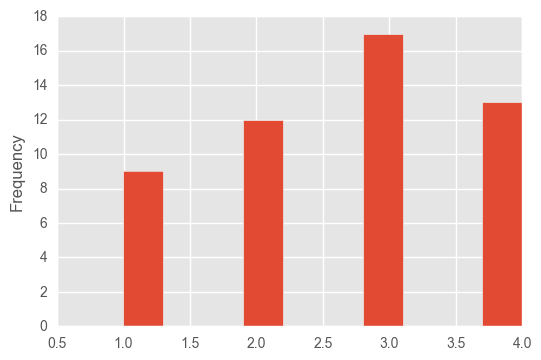

In [8]:
df['Region'].plot(kind= 'hist')

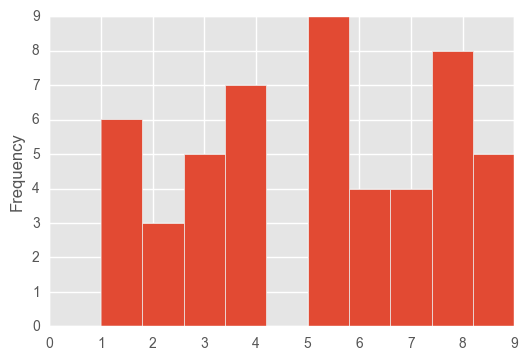

In [9]:
df['Division'].plot(kind= 'hist')

Examining the data over several plots seemed to indicate little notable difference over the time period covered.

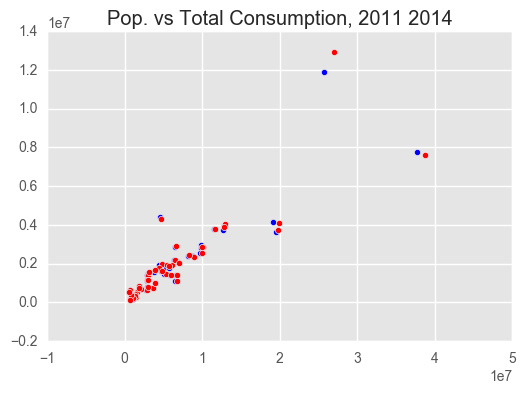

In [10]:
plt.scatter(df.POPESTIMATE2011, df.TotalC2011, c= 'b', label = '2011')
plt.scatter(df.POPESTIMATE2014, df.TotalC2014, c= 'r', label = '2014')
plt.title('Pop. vs Total Consumption, 2011 2014')

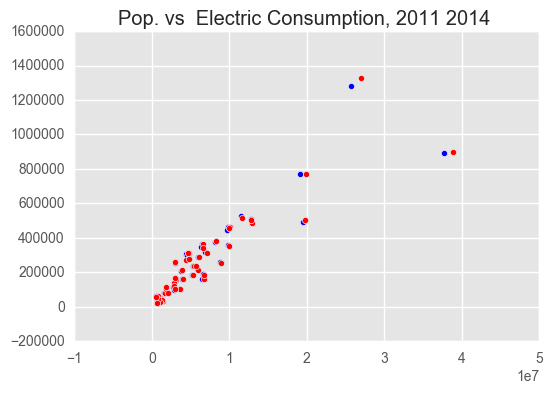

In [11]:
plt.scatter(df.POPESTIMATE2011, df.ElecC2011, c= 'b', label = '2011')
plt.scatter(df.POPESTIMATE2014, df.ElecC2014, c= 'r', label = '2014')
plt.title('Pop. vs  Electric Consumption, 2011 2014 ')

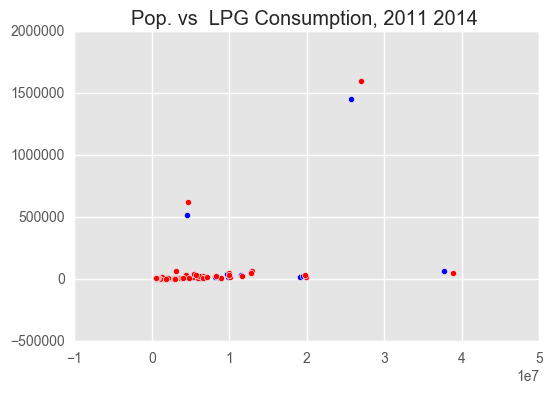

In [12]:
plt.scatter(df.POPESTIMATE2011, df.LPGC2011, c= 'b', label = '2011')
plt.scatter(df.POPESTIMATE2014, df.LPGC2014, c= 'r', label = '2014')
plt.title('Pop. vs  LPG Consumption, 2011 2014 ')

Dropped data for non-2014 years, as well as region 

In [13]:
df.drop(['Region', 'Coast', 'Great Lakes', 'TotalP2010', 'TotalP2011', 'TotalP2012',
       'TotalP2013', 'TotalP2014', 'TotalE2010', 'TotalE2011',
       'TotalE2012', 'TotalE2013', 'TotalE2014', 'TotalPrice2010',
       'TotalPrice2011', 'TotalPrice2012', 'TotalPrice2013',
       'TotalPrice2014', 'TotalC10-11', 'TotalC11-12', 'TotalC12-13',
       'TotalC13-14', 'TotalP10-11', 'TotalP11-12', 'TotalP12-13',
       'TotalP13-14', 'TotalE10-11', 'TotalE11-12', 'TotalE12-13',
       'TotalE13-14', 'TotalPrice10-11', 'TotalPrice11-12',
       'TotalPrice12-13', 'TotalPrice13-14', 
       'CoalP2010', 'CoalP2011', 'CoalP2012', 'CoalP2013', 'CoalP2014',
       'CoalE2010', 'CoalE2011', 'CoalE2012', 'CoalE2013', 'CoalE2014',
       'CoalPrice2010', 'CoalPrice2011', 'CoalPrice2012', 'CoalPrice2013',
       'CoalPrice2014',  'ElecE2010', 'ElecE2011', 'ElecE2012', 'ElecE2013',
       'ElecE2014', 'ElecPrice2010', 'ElecPrice2011', 'ElecPrice2012',
       'ElecPrice2013', 'ElecPrice2014',  'GeoP2010',
       'GeoP2011', 'GeoP2012', 'GeoP2013', 'GeoP2014', 
       'HydroP2010', 'HydroP2011', 'HydroP2012', 'HydroP2013',
       'HydroP2014',  'NatGasE2010', 'NatGasE2011',
       'NatGasE2012', 'NatGasE2013', 'NatGasE2014', 'NatGasPrice2010',
       'NatGasPrice2011', 'NatGasPrice2012', 'NatGasPrice2013',
       'NatGasPrice2014', 'LPGE2010', 'LPGE2011', 'LPGE2012', 'LPGE2013',
       'LPGE2014', 'LPGPrice2010', 'LPGPrice2011', 'LPGPrice2012',
       'LPGPrice2013', 'LPGPrice2014','TotalC2010', 'TotalC2011',
       'TotalC2012', 'TotalC2013', 'BiomassC2010',
       'BiomassC2011', 'BiomassC2012', 'BiomassC2013',
       'CoalC2010', 'CoalC2011', 'CoalC2012', 'CoalC2013',
       'ElecC2010', 'ElecC2011', 'ElecC2012', 'ElecC2013', 
       'FossFuelC2010', 'FossFuelC2011', 'FossFuelC2012', 'FossFuelC2013',
        'GeoC2010', 'GeoC2011', 'GeoC2012', 'GeoC2013',
       'HydroC2010', 'HydroC2011', 'HydroC2012', 'HydroC2013',
        'NatGasC2010', 'NatGasC2011', 'NatGasC2012',
       'NatGasC2013',  'LPGC2010', 'LPGC2011', 'LPGC2012',
       'LPGC2013',  'CENSUS2010POP', 'POPESTIMATE2010',
       'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013',
        'RBIRTH2011', 'RBIRTH2012', 'RBIRTH2013',
       'RDEATH2011', 'RDEATH2012', 'RDEATH2013',
        'RNATURALINC2011', 'RNATURALINC2012',
       'RNATURALINC2013',  'RINTERNATIONALMIG2011',
       'RINTERNATIONALMIG2012', 'RINTERNATIONALMIG2013',
       'RDOMESTICMIG2011', 'RDOMESTICMIG2012',
       'RDOMESTICMIG2013',  'RNETMIG2011',
       'RNETMIG2012', 'RNETMIG2013'], axis =1, inplace =True)

In [14]:
df.columns.values

array(['StateCodes', 'Division', 'TotalC2014', 'BiomassC2014', 'CoalC2014',
       'ElecC2014', 'FossFuelC2014', 'GeoC2014', 'HydroC2014',
       'NatGasC2014', 'LPGC2014', 'POPESTIMATE2014', 'RBIRTH2014',
       'RDEATH2014', 'RNATURALINC2014', 'RINTERNATIONALMIG2014',
       'RDOMESTICMIG2014', 'RNETMIG2014'], dtype=object)

Created dummy variables for Division

1 = New England

2 = Middle Atlantic

3 = East North Central

4 = West North Central

5 = South Atlantic

6 = East South Central

7 = West South Central 

8 = Mountain

9 = Pacific

In [15]:

df = df.join(pd.get_dummies(df['Division']))
df.drop(['Division'], axis =1, inplace =True)

Created a boolean variable for net migration rate 2014

In [16]:
df.columns.values


array(['StateCodes', 'TotalC2014', 'BiomassC2014', 'CoalC2014',
       'ElecC2014', 'FossFuelC2014', 'GeoC2014', 'HydroC2014',
       'NatGasC2014', 'LPGC2014', 'POPESTIMATE2014', 'RBIRTH2014',
       'RDEATH2014', 'RNATURALINC2014', 'RINTERNATIONALMIG2014',
       'RDOMESTICMIG2014', 'RNETMIG2014', 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
       7.0, 8.0, 9.0], dtype=object)

In [18]:
df['PopulationIncreased2014'] = df['RNETMIG2014'] > 0.0

In [19]:
feature_cols = ['TotalC2014', 'BiomassC2014', 'CoalC2014',
       'ElecC2014', 'FossFuelC2014', 'GeoC2014', 'HydroC2014',
       'NatGasC2014', 'LPGC2014', 'POPESTIMATE2014', 'RBIRTH2014',
       'RDEATH2014', 'RNATURALINC2014',1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
       7.0, 8.0, 9.0,]
X = df[feature_cols]
y = df['PopulationIncreased2014']

Decided to use Random forest modeling after logistic regression turned out to not suit the data

In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 20)
    
model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [21]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df

,Features,Importance Score
9,POPESTIMATE2014,0.120244
7,NatGasC2014,0.110468
0,TotalC2014,0.095515
4,FossFuelC2014,0.077709
1,BiomassC2014,0.074473
10,RBIRTH2014,0.070606
5,GeoC2014,0.068835
6,HydroC2014,0.065055
3,ElecC2014,0.053125
11,RDEATH2014,0.052038


Found the most important features, now to cross validate the forest

In [23]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, scoring='accuracy')
print('CV Accuracy {}, Average Accuracy {}'.format(scores, scores.mean()))

for n_trees in range(1, 100, 10):
    model = RandomForestClassifier(n_estimators = n_trees)
    scores = cross_val_score(model, X, y, scoring='accuracy')
    print('n trees: {}, CV accuracy {}, Average accuracy {}'.format(n_trees, scores, scores.mean()))

CV Accuracy [ 0.66666667  0.64705882  0.6875    ], Average Accuracy 0.667075163399
n trees: 1, CV accuracy [ 0.72222222  0.58823529  0.6875    ], Average accuracy 0.66598583878
n trees: 11, CV accuracy [ 0.61111111  0.58823529  0.5       ], Average accuracy 0.566448801743
n trees: 21, CV accuracy [ 0.66666667  0.58823529  0.6875    ], Average accuracy 0.647467320261
n trees: 31, CV accuracy [ 0.66666667  0.70588235  0.6875    ], Average accuracy 0.686683006536
n trees: 41, CV accuracy [ 0.66666667  0.58823529  0.6875    ], Average accuracy 0.647467320261
n trees: 51, CV accuracy [ 0.66666667  0.58823529  0.75      ], Average accuracy 0.668300653595
n trees: 61, CV accuracy [ 0.66666667  0.64705882  0.6875    ], Average accuracy 0.667075163399
n trees: 71, CV accuracy [ 0.66666667  0.64705882  0.6875    ], Average accuracy 0.667075163399
n trees: 81, CV accuracy [ 0.72222222  0.58823529  0.6875    ], Average accuracy 0.66598583878
n trees: 91, CV accuracy [ 0.66666667  0.64705882  0.687

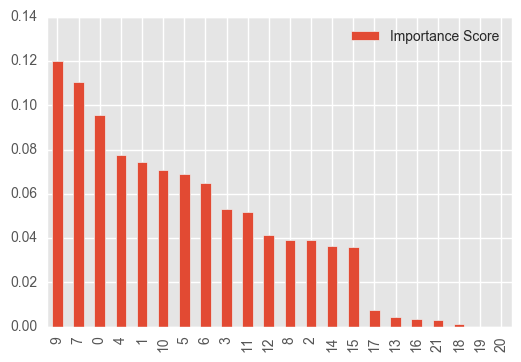

In [24]:
features_df.plot.bar()

## Methods
After cleaning the dataset, various features were plotted to observe their distribution.
It was decided to focus on energy consumption and population changes in a single year across divisions.
The divisions were one-hot encoded, while a boolean variable for the netMigration rate was created.
Logistic regression was attempted and then discarded after perplexing results and identification of multiples errors
Random forest was generated for the model, the various features were scored and then crossvalidated.

## Results
After running the random forest, which hit 70.7% accuracy with 51 trees, it was found that none of the features present in the model had particularly high importance scores, but the Rate of Birth, Oil Consumption and Total Energy Consumption scores were the most powerful predictors. Interestingly, the East North Central (3) division (15 on the table) had a much higher importance score compared to the rest of the divisions, which all fell below the population and energy features. 

## Discussion 
First steps would be increasing the workable data, possibly by breaking down each state into multiple rows for each year.
Check how GDP factors influence the migration rate.
Initial plan was regression based, more complex, fell apart after several mistakes were corrected.
